In [ ]:
import requests
import json
import pandas as pd
import yfinance as yf
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import time
from tqdm import tqdm
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [ ]:
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords

In [ ]:
import requests
import json
import pandas as pd
start_date = '20220301T0000'
end_date = '20230301T0000'

url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=6BCR14FXH6PQWFHL&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)

print(data)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s)

s.to_csv('s.csv', index=False)

{'items': '695', 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish', 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.', 'feed': [{'title': 'Tesla Rival Slashes 2022 Production Outlook; Lucid Stock Tumbles', 'url': 'https://www.investors.com/news/lucid-stock-lucid-earnings-q4-2021-lordstown-beats-but-sinks/', 'time_published': '20220301T080000', 'authors': ['APARNA NARAYANAN', "Investor's Business Daily"], 'summary': "Lucid Stock Sinks As Tesla Rival Slashes 2022 Production Outlook Investor's Business Daily", 'banner_image': 'https://www.investors.com/wp-content/uploads/2021/02/Stock-LucidMotors-05-company.jpg', 'source': 'Investors Business Daily', 'category_within_source': 'n/a', 'source_domain': 'www.investors.com', 'topics': [{'topic': 'Financial Markets', 'relevance_score': '0.996023'}, {'topic': 'Manufacturing', 'relev

In [ ]:
s.iloc[-1][-1]

<ipython-input-2-5a802278eb7b>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s.iloc[-1][-1]


'20220318T172900'

In [ ]:
start_date = '20220301T0000'
print(start_date)

20220301T0000


In [ ]:
start_date = s.iloc[-1][-1][:-2]
print(start_date)

20220318T1729


<ipython-input-4-323f4f512c7c>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s.iloc[-1][-1][:-2]


In [ ]:
start_date = s.iloc[-1][-1][:-2]
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s1 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s1)

s1.to_csv('s1.csv', index=False)

<ipython-input-5-1a766c0e90ea>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s.iloc[-1][-1][:-2]


                                               Summary   time_published
0    Rivian's share price has fallen sharply, and a...  20220318T172900
1    Rivian Automotive  ( NASDAQ: RIVN ) , the budd...  20220318T181308
2    Tesla's Elon Musk Is Working On Master Plan 3....  20220318T185400
3    With the Fed's first rate hike out of the way,...  20220318T191552
4    2022's First Real Rally Gains Steam; 5 Stocks ...  20220318T194245
..                                                 ...              ...
702  Tesla Inc  ( NASDAQ: TSLA )  CEO Elon Musk inv...  20220330T114743
703  The EV charging world is often mired in "gasol...  20220330T120000
704  The billionaire's disdain for unions is well k...  20220330T120000
705  The Bitcoin wallet belonging to Terra amassed ...  20220330T121753
706  Founded in 2003 and based in Palo Alto, Califo...  20220330T130000

[707 rows x 2 columns]


In [ ]:
start_date = s1.iloc[-1][-1][:-2]
print(start_date)

20220330T1300


<ipython-input-6-8e780109b224>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s1.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s2 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s2)

s2.to_csv('s2.csv', index=False)

                                               Summary   time_published
0    Founded in 2003 and based in Palo Alto, Califo...  20220330T130000
1    "Bryan is an accomplished business leader with...  20220330T130000
2    Finding strong, market-beating stocks with a p...  20220330T130007
3    These businesses have a dominant market positi...  20220330T132100
4    The price of nickel, which is used to make sta...  20220330T132901
..                                                 ...              ...
578  Less than forty-eight hours after disclosing h...  20220405T221500
579  We now have hoverboards and self-lacing shoes,...  20220405T222333
580  Twitter said in an SEC filing on Tuesday that ...  20220405T222607
581  Among the most tweeted about topics by Elon Mu...  20220405T223816
582  The Tesla CEO isn't known for being shy about ...  20220405T224659

[583 rows x 2 columns]


In [ ]:
start_date = s2.iloc[-1][-1][:-2]
print(start_date)

20220405T2246


<ipython-input-8-55e9ae6abed2>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s2.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s3 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s3)

s3.to_csv('s3.csv', index=False)

                                               Summary   time_published
0    The Tesla CEO isn't known for being shy about ...  20220405T224659
1    'Rapid' Fed Shift Hits Market Rally; How Musk ...  20220405T225600
2                                       Quite possibly  20220406T000000
3                                       Quite possibly  20220406T000000
4                                       Quite possibly  20220406T000000
..                                                 ...              ...
706  3 Top S&P 500 Stock Market Gainers Today: Amer...  20220413T202100
707  A new cryptocurrency nearing an April 30 launc...  20220413T205207
708  Mercedes-Benz completes 1000 km electric drive...  20220413T223000
709  What Does Market Share Mean? Market share refe...  20220413T230200
710  Don't Get Excited By Market Bounce; 7 Stocks N...  20220414T000500

[711 rows x 2 columns]


In [ ]:
start_date = s3.iloc[-1][-1][:-2]
print(start_date)

20220414T0005


<ipython-input-10-dfff3d1b5c9f>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s3.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s4 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s4)

s4.to_csv('s4.csv', index=False)

start_date = s4.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    Don't Get Excited By Market Bounce; 7 Stocks N...  20220414T000500
1    Nio Inc's  ( NYSE: NIO )  production lines are...  20220414T010209
2    The largest crypto by market cap is showing si...  20220414T025150
3    Tesla Inc  ( NASDAQ: TSLA )  bull Cathie Wood ...  20220414T031805
4    Tesla Inc  ( NASDAQ: TSLA )  bull Cathie Wood ...  20220414T031805
..                                                 ...              ...
624  CATL's market value dipped below 1 trillion yu...  20220420T080648
625  Companies Reporting Before The Bell\n• MarketA...  20220420T084040
626  U.S. equity futures traded lower Wednesday mor...  20220420T084422
627  Speculation is building that Elon Musk may be ...  20220420T084800
628  Inflation is here and it's wreaking havoc on t...  20220420T090031

[629 rows x 2 columns]
20220420T0900


<ipython-input-11-c9aee5fe3eaf>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s4.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s5 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s5)

s5.to_csv('s5.csv', index=False)

start_date = s5.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    Inflation is here and it's wreaking havoc on t...  20220420T090031
1    New York  (  CNN Business  )  Tesla shareholde...  20220420T090200
2    Some of the stocks that may grab investor focu...  20220420T090214
3    Tesla Inc  ( NASDAQ: TSLA )  CEO Elon Musk's S...  20220420T091018
4    A letter that appears to be from US chip maker...  20220420T094513
..                                                 ...              ...
693  Will Musk's hands-off ideal for Twitter have b...  20220426T064745
694  Will Musk's hands-off ideal for Twitter have b...  20220426T064745
695  Amazon founder Jeff Bezos speaks during the UN...  20220426T065200
696  Tech's big shots have learned again and again ...  20220426T070008
697  Jeff Bezos shared a tweet suggesting China may...  20220426T070416

[698 rows x 2 columns]
20220426T0704


<ipython-input-13-931065756ffe>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s5.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s6 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s6)

s6.to_csv('s6.csv', index=False)

start_date = s6.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    Jeff Bezos shared a tweet suggesting China may...  20220426T070416
1    "Making in China and selling here is not a goo...  20220426T073100
2    Speaking about the recent EV fires, Nitin Gadk...  20220426T073653
3    Twitter Inc  ( NYSE: TWTR )  CEO Parag Agrawal...  20220426T073752
4    Warren Buffett-backed Chinese electric vehicle...  20220426T081257
..                                                 ...              ...
702  The numbers alone suggest Musk's biggest heada...  20220503T115834
703  The Shanghai-based carmaker said its new US$7....  20220503T115916
704  Tesla Inc  ( NASDAQ: TSLA )  CEO Elon Musk sai...  20220503T120330
705  Dogecoin  ( CRYPTO: DOGE )  traded 1.1% lower ...  20220503T120925
706  This post contains sponsored advertising conte...  20220503T121105

[707 rows x 2 columns]
20220503T1211


<ipython-input-14-083b524646e8>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s6.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s7 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s7)

s7.to_csv('s7.csv', index=False)

start_date = s7.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    This post contains sponsored advertising conte...  20220503T121105
1    Bloomberg\nHere's How PayPal Helped Trigger EU...  20220503T121553
2    Dow Jones Futures Dip Ahead Of Fed Meeting; 7 ...  20220503T121600
3    This post contains sponsored advertising conte...  20220503T122026
4    Commodity prices are starting to affect electr...  20220503T122100
..                                                 ...              ...
696  Cathie Wood-led Ark Investment Management on W...  20220512T131609
697  Some 4,767 electric cars built at the Gigafact...  20220512T133011
698  Elon Musk is facing an investigation into the ...  20220512T133016
699  Surging input costs, chip shortages and China'...  20220512T134100
700  Rivian Automotive Inc ( NASDAQ: RIVN ) has the...  20220512T135355

[701 rows x 2 columns]
20220512T1353


<ipython-input-15-1db322353fe4>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s7.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s8 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s8)

s8.to_csv('s8.csv', index=False)

start_date = s8.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    Rivian Automotive Inc ( NASDAQ: RIVN ) has the...  20220512T135355
1    Bitcoin's current price means that Tesla and M...  20220512T140554
2    CNN's Matt Egan contributed to this story New ...  20220512T142100
3    CNN's Matt Egan contributed to this story New ...  20220512T142100
4    On Thursday, the Dow Jones Industrial Average ...  20220512T142448
..                                                 ...              ...
695  If there's more bad news from retailers in the...  20220520T175923
696       Get ready to spend even more time on TikTok.  20220520T180400
697  A report by Business Insider said SpaceX paid ...  20220520T181037
698  A trader works on the trading floor at the New...  20220520T184300
699  The index fell below and fluctuated around 3,8...  20220520T185013

[700 rows x 2 columns]
20220520T1850


<ipython-input-16-85dd0bffe79d>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s8.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s9 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s9)

s9.to_csv('s9.csv', index=False)

start_date = s9.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    The index fell below and fluctuated around 3,8...  20220520T185013
1    TWTR Stock Ready For Shareholder Meeting Inves...  20220520T191100
2    The index fell below and fluctuated around 3,8...  20220520T191355
3    Taxi driver in hazmat suit was part of the way...  20220520T192807
4    The Dow Jones Industrial Average plunged while...  20220520T192900
..                                                 ...              ...
699  Ford's EV sales more than tripled in May. Here...  20220602T161700
700  Microsoft down after trimming forecast due to ...  20220602T163200
701  Tesla's CEO recently said he would vote Republ...  20220602T163300
702  Police departments across the country have sta...  20220602T164208
703  Amazon is facing attacks on multiple fronts fr...  20220602T164300

[704 rows x 2 columns]
20220602T1643


<ipython-input-17-aebded80c2f0>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s9.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s10 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s10)

s10.to_csv('s10.csv', index=False)

start_date = s10.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    Amazon is facing attacks on multiple fronts fr...  20220602T164300
1    Ford unveils big plans as it looks to transfor...  20220602T165900
2    Is the EV company making a mistake in how it's...  20220602T170811
3    The Chinese government has warned the Biden ad...  20220602T171022
4    Ford unveils big plans as it looks to transfor...  20220602T173400
..                                                 ...              ...
700  Dow Jones Slammed. Tesla Stock Dives As Tech G...  20220613T190500
701  Electric Last Mile Solutions says it will file...  20220613T193200
702  Tesla, Inc TSLA was slipping over 5% lower on ...  20220613T194411
703  3 Top Solar Energy Stocks To Check Out In The ...  20220613T203000
704  As prices soar, markets tumble-and the Democra...  20220613T203922

[705 rows x 2 columns]
20220613T2039


<ipython-input-18-4c47583cd6ea>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s10.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s11 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s11)

s11.to_csv('s11.csv', index=False)

start_date = s11.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    As prices soar, markets tumble-and the Democra...  20220613T203922
1    The broad index dropped 3.88% to 3,749.63, fal...  20220613T210105
2    Space Exploration Technologies Corp., better k...  20220613T213800
3    Yen hits fresh 24-year low, US stocks trade in...  20220613T214145
4    NEW YORK ( AP ) - Wall Street tumbled into a b...  20220613T215924
..                                                 ...              ...
703  The S&P 500 last week confirmed a bear market,...  20220623T115509
704  Tesla Inc TSLA China supplier CATL has shipped...  20220623T120629
705  American Airlines Group Inc AAL plans to disco...  20220623T121622
706  Tesla, Inc. TSLA recently announced another ro...  20220623T122550
707  MONTREAL, June 23, 2022 ( GLOBE NEWSWIRE ) -- ...  20220623T123000

[708 rows x 2 columns]
20220623T1230


<ipython-input-19-2b2ba68b2ea8>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s11.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s12 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s12)

s12.to_csv('s12.csv', index=False)

start_date = s12.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    MONTREAL, June 23, 2022 ( GLOBE NEWSWIRE ) -- ...  20220623T123000
1    Westford, USA, June 23, 2022 ( GLOBE NEWSWIRE ...  20220623T124333
2    2023 Toyota bZ4X all-electric SUV is displayed...  20220623T124900
3    Retail traders have been helping to drive gain...  20220623T125832
4    No matter what you may think of Tesla and its ...  20220623T130000
..                                                 ...              ...
697  Tesla and SpaceX CEO Elon Musk's $44 billion d...  20220707T222733
698  Shares of social media platform Twitter Inc TW...  20220707T230532
699  Tesla's billionaire CEO worries about a declin...  20220707T230700
700  CNN President Jeff Zucker attends a keynote ev...  20220707T233600
701  The premium electric vehicle maker could launc...  20220707T233700

[702 rows x 2 columns]
20220707T2337


<ipython-input-20-ee0953929aa7>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s12.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s13 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s13)

s13.to_csv('s13.csv', index=False)

start_date = s13.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    The premium electric vehicle maker could launc...  20220707T233700
1    Musk's team has concluded Twitter cannot verif...  20220708T015441
2    Tesla Inc TSLA CEO Elon Musk has reacted to th...  20220708T035622
3    U.S. job growth likely slowed in June. unemplo...  20220708T040500
4    Twitter has repeatedly said that the number of...  20220708T051308
..                                                 ...              ...
696  Elon Musk-led SpaceX has been prolific in send...  20220719T131412
697  Tesla TSLA reports second quarter earnings aft...  20220719T133215
698  DOVER, Del. ( AP ) - Twitter's lawsuit to forc...  20220719T134249
699  Apple will reportedly slow its hiring and spen...  20220719T140843
700  Google executed a 20-for-1 stock split on Mond...  20220719T142051

[701 rows x 2 columns]
20220719T1420


<ipython-input-21-aa8f90db5566>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s13.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s14 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s14)

s14.to_csv('s14.csv', index=False)

start_date = s14.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    Google executed a 20-for-1 stock split on Mond...  20220719T142051
1    Don't fear recessions since more millionaires ...  20220719T142955
2    Why Is Lithium Important?Lithium is an importa...  20220719T143000
3    ( Tuesday Market Open ) A big slide in the U.S...  20220719T143007
4    Johnson & Johnson higher after Q2 profit beat....  20220719T144000
..                                                 ...              ...
692  Some of the big-money investment funds on Wall...  20220729T043000
693  DETROIT ( AP ) - The surprise deal by Senate D...  20220729T050101
694  Most publicly traded companies can only realiz...  20220729T053927
695  A boy refreshes himself in a fountain during h...  20220729T074900
696  The Pershing Square fund manager says Fed offi...  20220729T085800

[697 rows x 2 columns]
20220729T0858


<ipython-input-22-6190918b1b13>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s14.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s15 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s15)

s15.to_csv('s15.csv', index=False)

start_date = s15.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    The Pershing Square fund manager says Fed offi...  20220729T085800
1    Electric vehicles could become a lot more affo...  20220729T093042
2    I saw at least three good reasons to sell 90% ...  20220729T093700
3    Are these useful options for long-term investors?  20220729T094500
4    Twitter, Inc's TWTR premium Blue offering, whi...  20220729T105845
..                                                 ...              ...
687  The SP 500 ( .SPX ) closed a tad lower after e...  20220812T004011
688  Wall Street erases gains as rebound in bond yi...  20220812T011911
689  Hong Kong's benchmark index Hang Seng today op...  20220812T022058
690  Market Fades, But This Sector Leads. 5 Stocks ...  20220812T022800
691  Chasing green goals, corporations push car fle...  20220812T060700

[692 rows x 2 columns]
20220812T0607


<ipython-input-23-b52b7514e5d9>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s15.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s16 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s16)

s16.to_csv('s16.csv', index=False)

start_date = s16.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    Chasing green goals, corporations push car fle...  20220812T060700
1    Ray Dalio's giant hedge fund completely exited...  20220812T060727
2    The Bear Market Could Finally Break Index Fund...  20220812T070000
3    U.S. stocks closed mixed on Thursday, after re...  20220812T073539
4    The Inflation Reduction Act that recently rece...  20220812T083825
..                                                 ...              ...
670  These are two of the most dominant companies o...  20220821T125000
671  Looka.com released a ranking of the best U.S. ...  20220821T131501
672  Twitter, Inc. TWTR is reportedly scaling back ...  20220821T132512
673           It offers three benefits to Tesla stock.  20220821T133800
674  The electric vehicle maker's management talks ...  20220821T140824

[675 rows x 2 columns]
20220821T1408


<ipython-input-24-416080c89138>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s16.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s17 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s17)

s17.to_csv('s17.csv', index=False)

start_date = s17.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    The electric vehicle maker's management talks ...  20220821T140824
1    More and more powerful people, whether because...  20220821T141110
2    Tesla Is Doubling Down On Full Self Driving. R...  20220821T155600
3    Elon Musk said on Sunday that Tesla plans a pr...  20220821T173556
4    Battery electric vehicle forecasts in Europe p...  20220821T174303
..                                                 ...              ...
682  Toyota will triple its planned investment in a...  20220831T171404
683  General Motors Company GM CEO Mary Barra recen...  20220831T172832
684  A look at the Tesla stock split to determine h...  20220831T175258
685  The CEO of Tesla and the founder of Amazon rem...  20220831T181700
686  The U.S. auto market is upside down right now ...  20220831T181900

[687 rows x 2 columns]
20220831T1819


<ipython-input-25-6fc07b3fb580>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s17.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s18 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s18)

s18.to_csv('s18.csv', index=False)

start_date = s18.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    The U.S. auto market is upside down right now ...  20220831T181900
1    Competitors are taking concrete steps to dig i...  20220831T183112
2    Saylor, who stepped down as MicroStrategy's ch...  20220831T190155
3    Benzinga regularly conducts surveys to collect...  20220831T200933
4    DETROIT ( AP ) - General Motors said Wednesday...  20220831T204513
..                                                 ...              ...
662  The company is No. 1, apparently, in a race fe...  20220915T220900
663  The dollar amount of shares sold short is 'pre...  20220915T221800
664  Tesla Inc. Chief Executive Elon Musk pointed i...  20220915T223800
665  Always check a fund's top 10 holdings to make ...  20220916T040054
666  Tesla Inc TSLA CEO Elon Musk has thrown more s...  20220916T045826

[667 rows x 2 columns]
20220916T0458


<ipython-input-26-32e86c1ce5d1>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s18.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s19 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s19)

s19.to_csv('s19.csv', index=False)

start_date = s19.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    Tesla Inc TSLA CEO Elon Musk has thrown more s...  20220916T045826
1    Adani's wealth surged to make him the second r...  20220916T064200
2    Dacia cars are displayed during the Brand Mani...  20220916T071100
3    Gautam Adani becomes world's 2nd richest perso...  20220916T072840
4    China's property giant Evergrande began produc...  20220916T075954
..                                                 ...              ...
700  Tesla's logistical challenges overshadow recor...  20221003T065356
701  Tesla, Inc. TSLA has a tall order before it if...  20221003T070040
702  Twitter wants a Delaware court to order Elon M...  20221003T070216
703  Twitter wants a Delaware court to order Elon M...  20221003T070216
704  StockNews.com downgraded shares of Imperial Oi...  20221003T070643

[705 rows x 2 columns]
20221003T0706


<ipython-input-27-db9027dfc0d2>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s19.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s20 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s20)

s20.to_csv('s20.csv', index=False)

start_date = s20.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    StockNews.com downgraded shares of Imperial Oi...  20221003T070643
1    StockNews.com upgraded shares of CorMedix ( NY...  20221003T070643
2    In my recent conversation with Gaussin managem...  20221003T074135
3    Twitter wants a Delaware court to order Elon M...  20221003T083156
4    With US stock futures trading mixed this morni...  20221003T084338
..                                                 ...              ...
700  Stock splits are all the rage on Wall Street -...  20221013T090600
701  ARK Innovation ETF, AXS Short Innovation Daily...  20221013T092100
702  Stock prices may be falling, but there are way...  20221013T093000
703  Which lesser-known EV company is a more promis...  20221013T094200
704  U.S. stock futures traded higher in early pre-...  20221013T094332

[705 rows x 2 columns]
20221013T0943


<ipython-input-28-9d4a564c8432>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s20.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s21 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s21)

s21.to_csv('s21.csv', index=False)

start_date = s21.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    U.S. stock futures traded higher in early pre-...  20221013T094332
1    The same transition to clean energy is happeni...  20221013T100000
2    The famed stockpicker is doubling down on her ...  20221013T103000
3    Polestar unveils the Polestar 3 in an effort t...  20221013T110600
4    US Stocks: Wall Street futures edge higher ahe...  20221013T113840
..                                                 ...              ...
665               Why investors aren't going green ...  20221024T111800
666  Tesla shares fall further as it cuts price on ...  20221024T113300
667  U.S.-listed Chinese stocks are nosediving in t...  20221024T114136
668  The stocks making the biggest moves in premark...  20221024T114231
669  S&P 500 Earnings Calendar This Week: Stocks to...  20221024T114817

[670 rows x 2 columns]
20221024T1148


<ipython-input-29-953273c6f305>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s21.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s22 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s22)

s22.to_csv('s22.csv', index=False)

start_date = s22.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    S&P 500 Earnings Calendar This Week: Stocks to...  20221024T114817
1    Stocks in Hong Kong plunged Monday in their wo...  20221024T114945
2    Investors appeared heartened by the prospect o...  20221024T115135
3    Some upbeat earnings and the likelihood of slo...  20221024T120000
4    It's been a rough year for all investors - wit...  20221024T120000
..                                                 ...              ...
701  Twitter CEO Elon Musk is polling his more than...  20221103T014553
702  Musk also intends to reverse the company's exi...  20221103T015300
703  The billionaire who also runs Tesla plans to e...  20221103T015521
704  Phoenix's booming e-bike industry hampered by ...  20221103T023516
705  A daily round-up of the most interesting artic...  20221103T034951

[706 rows x 2 columns]
20221103T0349


<ipython-input-30-33d58493f46a>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s22.iloc[-1][-1][:-2]


In [ ]:
start_date =  '20221103T0349'

end_date = '20241001T0000'

In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s23 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s23)

s23.to_csv('s23.csv', index=False)

start_date = s23.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    A daily round-up of the most interesting artic...  20221103T034951
1    Stock Market Rally Tumbles As Fed's Powell Hin...  20221103T043026
2    Why hydrogen could propel India's sustainable ...  20221103T055229
3    S&P 500 fell 2.5% in worst performance for any...  20221103T060730
4    Europe leans on Asia for 'homegrown' EV batter...  20221103T064844
..                                                 ...              ...
699  Companies including Electronic Arts, ON Semico...  20221114T153200
700  But it's not a "kumbaya" moment, Biden cautioned.  20221114T153545
701  Tesla Inc TSLA shares are trading lower by 1.8...  20221114T154008
702  The electric-vehicle maker is warning Tesla ow...  20221114T160000
703  Tesla, Inc TSLA opened slightly lower Monday a...  20221114T161619

[704 rows x 2 columns]
20221114T1616


<ipython-input-7-0be97afc73c5>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s23.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s24 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s24)

s24.to_csv('s24.csv', index=False)

start_date = s24.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    Tesla, Inc TSLA opened slightly lower Monday a...  20221114T161619
1    EV stocks are a hot commodity right now, and f...  20221114T163051
2    The climate change-denial tag "ClimateScam" ha...  20221114T164602
3    Subscribe to the Forbes AI newsletter to stay ...  20221114T164623
4    Tesla said it will assist a police probe into ...  20221114T165721
..                                                 ...              ...
693  After floating a peace plan to end the Ukraine...  20221126T154500
694  The German premium vehicle manufacturer has fo...  20221126T161900
695  We often aren't missing out -- even when we th...  20221126T165500
696  Tensions between the CEO of Twitter and Apple ...  20221126T170000
697  After Twitter CEO Elon Musk floated the idea o...  20221126T193927

[698 rows x 2 columns]
20221126T1939


<ipython-input-8-c41d1726aff6>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s24.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s25 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s25)

s25.to_csv('s25.csv', index=False)

start_date = s25.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    After Twitter CEO Elon Musk floated the idea o...  20221126T193927
1    Tesla's billionaire CEO voted Republican for t...  20221126T201100
2    Benzinga examined the prospects for many inves...  20221126T202053
3    A statue honoring Elon Musk has become the new...  20221126T230444
4    The road ahead, for Jaguar, more than Land Rov...  20221127T041809
..                                                 ...              ...
708  The infectious-disease expert, elevated to chi...  20221212T124900
709  Recession is likely next year, at least accord...  20221212T130000
710  Toyota to Change EV Strategy in Bid to Catch T...  20221212T130500
711  Dow Jones futures rose Monday morning, despite...  20221212T132200
712  The EV upstart ends an ambitious project with ...  20221212T132400

[713 rows x 2 columns]
20221212T1324


<ipython-input-9-bc29999785ce>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s25.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s26 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s26)

s26.to_csv('s26.csv', index=False)

start_date = s26.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    The EV upstart ends an ambitious project with ...  20221212T132400
1    Even after a roughly 50% decline this year, th...  20221212T132500
2    Toyota to Change EV Strategy in Bid to Catch T...  20221212T133500
3    NEW YORK, Dec. 12, 2022 /PRNewswire/ -- Autono...  20221212T134000
4    Tesla (TSLA) has received quite a bit of atten...  20221212T140011
..                                                 ...              ...
706  Billionaire Elon Musk said on Thursday he will...  20221223T041844
707  Tesla shares tank after U.S. discounts doubled...  20221223T051015
708  A look at the day ahead in European and global...  20221223T053200
709  US Senate committee asks carmakers about Chine...  20221223T061734
710  The Tesla Inc. TSLA sell-off continues with no...  20221223T065404

[711 rows x 2 columns]
20221223T0654


<ipython-input-10-ef16e8f9b1ef>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s26.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s25 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s25)

s25.to_csv('s25.csv', index=False)

start_date = s25.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    The Tesla Inc. TSLA sell-off continues with no...  20221223T065404
1    A currency trader walks by the screen showing ...  20221223T065644
2    Asian markets follow Wall St lower on inflatio...  20221223T065644
3    PhonePe separates from Flipkart ahead of IPO T...  20221223T070551
4    The CNN Money Fear and Greed index showed an i...  20221223T080733
..                                                 ...              ...
706  Tesla and Twitter CEO Elon Musk said "The Popu...  20230103T123020
707  Nio and Li Auto stocks surged, after the China...  20230103T123100
708  The new investment is expected to help push fo...  20230103T123205
709  These are the stocks posting the largest moves...  20230103T124125
710  Gorilla Technology Group Inc. GRRR shares rose...  20230103T125524

[711 rows x 2 columns]
20230103T1255


<ipython-input-11-bc29999785ce>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s25.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s26 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s26)

s26.to_csv('s26.csv', index=False)

start_date = s26.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    Gorilla Technology Group Inc. GRRR shares rose...  20230103T125524
1    Tesla fourth quarter deliveries disappointed a...  20230103T125900
2    The long weekend on account of the public holi...  20230103T131240
3    Dow Jones Futures Rise 150 Points Ahead Of Eco...  20230103T132300
4    US stock market performance 2022, a review of ...  20230103T133700
..                                                 ...              ...
697  Tesla Plunges 4% On Price Cuts. Are Meme Stock...  20230113T171900
698  The stock market rally, building on the Jan. 6...  20230113T172300
699  A price war in electric cars will benefit no one.  20230113T172714
700  The electric-vehicle leader has now dropped pr...  20230113T172800
701  These are the stocks posting the largest moves...  20230113T174210

[702 rows x 2 columns]
20230113T1742


<ipython-input-12-ef16e8f9b1ef>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s26.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s27 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s27)

s27.to_csv('s27.csv', index=False)

start_date = s27.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    These are the stocks posting the largest moves...  20230113T174210
1    Nio, Inc NIO opened about 3% lower on Friday, ...  20230113T175644
2    Elon Musk's Tesla price cuts: Tesla favorabili...  20230113T181734
3    Lower prices challenge electric carmaker's riv...  20230113T185251
4    With its sales slowing and its stock price tum...  20230113T185800
..                                                 ...              ...
709  Musk defiant, defends himself in Tesla buyout ...  20230125T021000
710  Twitter has found itself facing rent-related l...  20230125T021240
711  Tesla had to cut prices recently to increase d...  20230125T024800
712  Wall Street weakens on worries about corporate...  20230125T064901
713  Global shares mixed, China markets closed for ...  20230125T064901

[714 rows x 2 columns]
20230125T0649


<ipython-input-13-efb8ca3444fc>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s27.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s28 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s28)

s28.to_csv('s28.csv', index=False)

start_date = s28.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    Wall Street weakens on worries about corporate...  20230125T064901
1    Global shares mixed, China markets closed for ...  20230125T064901
2    NEW YORK ( AP ) - Wall Street is weakening Wed...  20230125T064901
3    Global shares mixed, China markets closed for ...  20230125T064901
4    NEW YORK ( AP ) - Wall Street is weakening Wed...  20230125T064901
..                                                 ...              ...
714  A San Francisco jury on Friday found Elon Musk...  20230203T003345
715  Kansas Gov. Laura Kelly discusses plans by Int...  20230203T004531
716  U.S. markets surged on Thursday led by upbeat ...  20230203T010911
717  Dow Jones Futures: Apple, Google, Amazon Skid,...  20230203T020000
718  Bill Gates on Elon Musk: I'd Rather Fund Vacci...  20230203T023043

[719 rows x 2 columns]
20230203T0230


<ipython-input-14-5a13100dd1bc>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s28.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s29 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s29)

s29.to_csv('s29.csv', index=False)

start_date = s29.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    Bill Gates on Elon Musk: I'd Rather Fund Vacci...  20230203T023043
1    The Joe Biden administration is echoing the se...  20230203T024645
2    Adani Vs Hindenburg: Adani's Wealth Tanked $52...  20230203T050457
3    Adani Vs Hindenburg: Adani's Wealth Tanked $52...  20230203T050457
4    Prices of some Tesla models cut in South Korea...  20230203T064000
..                                                 ...              ...
717  Wall Street slips on worries about high inflat...  20230216T073208
718  Wall Street slips on worries about high inflat...  20230216T073208
719  Joe Biden Praises Musk for Opening up Tesla's ...  20230216T074523
720  Biden offered Elon Musk a rare bit of praise a...  20230216T074523
721  The EQB 250+ makes its debut as the new entry-...  20230216T100500

[722 rows x 2 columns]
20230216T1005


<ipython-input-15-5798a2f7bf54>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s29.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s30 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s30)

s30.to_csv('s30.csv', index=False)

start_date = s30.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    The EQB 250+ makes its debut as the new entry-...  20230216T100500
1    Select Wall Street analysts believe these wide...  20230216T100600
2    Tesla's agreement to open part of its propriet...  20230216T103000
3    US stocks closed higher on Wednesday, after re...  20230216T103001
4    How to invest in Nasdaq 100 stocks without ope...  20230216T105729
..                                                 ...              ...
721  Each trading day features hundreds of headline...  20230301T204515
722  Tesla is readying a production revamp of its t...  20230301T204652
723  What is ESG investing and why do some hate it ...  20230301T205630
724  Stock Market News Today: Rising Interest Rates...  20230301T210610
725  PSTG Stock: Pure Storage Earnings Miss Estimat...  20230301T213000

[726 rows x 2 columns]
20230301T2130


<ipython-input-16-43c96933408a>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s30.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s31 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s31)

s31.to_csv('s31.csv', index=False)

start_date = s31.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    PSTG Stock: Pure Storage Earnings Miss Estimat...  20230301T213000
1    The rumor mill continues to churn over who Twi...  20230301T213949
2    Splunk Stock Drops As Earnings Fall Short | In...  20230301T214500
3     Tesla Inc. hosts an investor day late Wednesday.  20230301T215300
4    Chasing Microsoft, global tech giants have rol...  20230301T220650
..                                                 ...              ...
713  Dow Jones Futures Fall 500 Points As Credit Su...  20230315T110435
714  High levels of uninsured deposits helped do in...  20230315T120038
715  This leading electric automaker has impressive...  20230315T121000
716  Market trends suggest that the S&P 500 will pe...  20230315T121647
717  Twitter and Tesla Inc. TSLA CEO Elon Musk was ...  20230315T122047

[718 rows x 2 columns]
20230315T1220


<ipython-input-17-9bd15c52e561>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s31.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s32 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s32)

s32.to_csv('s32.csv', index=False)

start_date = s32.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    Twitter and Tesla Inc. TSLA CEO Elon Musk was ...  20230315T122047
1    Dow Jones Futures Dive 550 Points On Renewed B...  20230315T122714
2    At this point, automotive investors should ass...  20230315T123540
3    Meta Platforms CEO Mark Zuckerberg sounds a li...  20230315T123814
4    Rivian and Nio could be worth a look even if b...  20230315T124500
..                                                 ...              ...
703  Starting with the 2024 Chevrolet Blazer EV lau...  20230331T140000
704  The tech-heavy Shoptalk industry convention wa...  20230331T142308
705  Tesla chief executive Elon Musk wants to visit...  20230331T143148
706  Digital World Acquisition Corp DWAC gapped up ...  20230331T144311
707  Tesla ( TSLA ) is recalling the bulk of its ea...  20230331T144600

[708 rows x 2 columns]
20230331T1446


<ipython-input-18-0569ea30fed5>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s32.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s33 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s33)

s33.to_csv('s33.csv', index=False)

start_date = s33.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    Tesla ( TSLA ) is recalling the bulk of its ea...  20230331T144600
1    Fewer Electric Vehicles Qualify for Ev Tax Cre...  20230331T145213
2    IRS's Update on EV Tax Credits Leaves a Big Qu...  20230331T150700
3    StockNews.com Initiates Sell Rating on Azure P...  20230331T151350
4    March 31 ( Reuters ) - Shares of Nikola Corp (...  20230331T151400
..                                                 ...              ...
720  LVMH chief executive, founder and chairman Ber...  20230414T083100
721  Tesla Discounts Cars in Singapore to Make Them...  20230414T084334
722  LVMH CEO Bernard Arnault's Wealth Soared to a ...  20230414T084917
723  Student Who Tracks Musk's Private Jet Says Mus...  20230414T090000
724  Most Funds Couldn't Beat the Stock Market in 2...  20230414T090024

[725 rows x 2 columns]
20230414T0900


<ipython-input-19-e9ebd8c91809>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s33.iloc[-1][-1][:-2]


In [ ]:
url = f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=TSLA&apikey=YT1SROOTAE2PCOAY&time_from={start_date}&time_to={end_date}&limit=1000&sort=EARLIEST"
payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
if response.status_code == 200:
    data = response.json()
    with open('response_data.json', 'w') as json_file:
        json.dump(data, json_file)
else:
    print("Error:", response.status_code)

with open('response_data.json', 'r') as json_file:
    data = json.load(json_file)



summaries = []
dates = []

for article in data['feed']:
    summaries.append(article['summary'])
    dates.append(article['time_published'])

# Creating a DataFrame
s34 = pd.DataFrame({
    'Summary': summaries,
    'time_published': dates
})


# Displaying the DataFrame with converted datetime
print(s33)

s34.to_csv('s34.csv', index=False)

start_date = s34.iloc[-1][-1][:-2]
print(start_date)

                                               Summary   time_published
0    Tesla ( TSLA ) is recalling the bulk of its ea...  20230331T144600
1    Fewer Electric Vehicles Qualify for Ev Tax Cre...  20230331T145213
2    IRS's Update on EV Tax Credits Leaves a Big Qu...  20230331T150700
3    StockNews.com Initiates Sell Rating on Azure P...  20230331T151350
4    March 31 ( Reuters ) - Shares of Nikola Corp (...  20230331T151400
..                                                 ...              ...
720  LVMH chief executive, founder and chairman Ber...  20230414T083100
721  Tesla Discounts Cars in Singapore to Make Them...  20230414T084334
722  LVMH CEO Bernard Arnault's Wealth Soared to a ...  20230414T084917
723  Student Who Tracks Musk's Private Jet Says Mus...  20230414T090000
724  Most Funds Couldn't Beat the Stock Market in 2...  20230414T090024

[725 rows x 2 columns]
20230422T0141


<ipython-input-20-b8563891d6f8>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_date = s34.iloc[-1][-1][:-2]


In [ ]:
import pandas as pd

# Read the CSV files
df1 = pd.read_csv('s.csv')  # CSV with rows 1-100
df2 = pd.read_csv('s1.csv')  # CSV with rows 1-200
df3 = pd.read_csv('s2.csv')
df4 = pd.read_csv('s3.csv')
df5 = pd.read_csv('s4.csv')
df6 = pd.read_csv('s5.csv')
df7 = pd.read_csv('s6.csv')
df8 = pd.read_csv('s7.csv')
df9 = pd.read_csv('s8.csv')
df10 = pd.read_csv('s9.csv')
df11 = pd.read_csv('s10.csv')
df12 = pd.read_csv('s11.csv')
df16 = pd.read_csv('s12.csv')
df17 = pd.read_csv('s13.csv')
df18 = pd.read_csv('s14.csv')
df19 = pd.read_csv('s15.csv')
df20 = pd.read_csv('s16.csv')
df21 = pd.read_csv('s17.csv')
df22 = pd.read_csv('s18.csv')
df23 = pd.read_csv('s19.csv')
df24 = pd.read_csv('s20.csv')
df25 = pd.read_csv('s21.csv')
df26 = pd.read_csv('s22.csv')


# Check if the CSV files have the same columns
if list(df1.columns) == list(df2.columns):
    # Concatenate the DataFrames
    combined_df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26], ignore_index=True)
else:
    print("The CSV files have different structures and cannot be directly concatenated.")

# Optionally, if you want to remove duplicates (for overlapping rows), you can do:
combined_df.drop_duplicates(inplace=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('one_year.csv', index=False)

In [ ]:
import pandas as pd

# Read the CSV files
df1 = pd.read_csv('one_year.csv')  # CSV with rows 1-100
df2 = pd.read_csv('s23.csv')  # CSV with rows 1-200
df3 = pd.read_csv('s24.csv')
df4 = pd.read_csv('s25.csv')
df5 = pd.read_csv('s26.csv')
df6 = pd.read_csv('s27.csv')
df7 = pd.read_csv('s28.csv')
df8 = pd.read_csv('s29.csv')
df9 = pd.read_csv('s30.csv')
df10 = pd.read_csv('s31.csv')
df11 = pd.read_csv('s32.csv')
df12 = pd.read_csv('s33.csv')
df16 = pd.read_csv('s34.csv')
df17 = pd.read_csv('s35.csv')
df18 = pd.read_csv('s36.csv')
df19 = pd.read_csv('s37.csv')
df20 = pd.read_csv('s38.csv')
df21 = pd.read_csv('s39.csv')
df22 = pd.read_csv('s40.csv')
df23 = pd.read_csv('s41.csv')
df24 = pd.read_csv('s42.csv')
df25 = pd.read_csv('s43.csv')
df26 = pd.read_csv('s44.csv')
df27 = pd.read_csv('s45.csv')
df28 = pd.read_csv('s46.csv')
df29 = pd.read_csv('s47.csv')
df30 = pd.read_csv('s48.csv')
df31 = pd.read_csv('s49.csv')
df32 = pd.read_csv('s50.csv')
df33 = pd.read_csv('s51.csv')
df34 = pd.read_csv('s52.csv')
df35 = pd.read_csv('s53.csv')
df36 = pd.read_csv('s54.csv')
df37 = pd.read_csv('s55.csv')
df38 = pd.read_csv('s56.csv')
df39 = pd.read_csv('s57.csv')
df40 = pd.read_csv('s58.csv')



# Check if the CSV files have the same columns
if list(df1.columns) == list(df2.columns):
    # Concatenate the DataFrames
    combined_df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,df31,df32,df33,df34,df35,df36,df37,df38,df39,df40], ignore_index=True)
else:
    print("The CSV files have different structures and cannot be directly concatenated.")

# Optionally, if you want to remove duplicates (for overlapping rows), you can do:
combined_df.drop_duplicates(inplace=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('two_year.csv', index=False)

In [ ]:
df = pd.read_csv('/content/two_year.csv')

In [ ]:
df

,Summary,time_published
0,Lucid Stock Sinks As Tesla Rival Slashes 2022 ...,20220301T080000
1,Live updates: Dow tumbles as Russia threatens ...,20220301T080000
2,"BYD, China's biggest electric vehicle (EV) bui...",20220301T113014
3,China's three biggest makers of smart electric...,20220301T163019
4,Box Stock Jumps As Earnings Beat Estimates Inv...,20220302T080000
...,...,...
39986,Elon Musk calls on Microsoft CEO for laptop is...,20240227T165800
39987,The Chinese EV maker is a long-term buy with a...,20240227T172205
39988,"To gain an edge, this is what you need to know...",20240227T173025
39989,A majority of workers at Mercedes-Benz's Alaba...,20240227T175145


In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

# Load the tokenizer and model
MODEL_NAME = 'ProsusAI/finbert'
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
import torch
import torch.nn.functional as F

# Define a function to predict sentiment and return the probabilities for all classes
def predict_sentiment_with_weights(text):
    # Tokenize the text and obtain predictions
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        logits = model(**inputs).logits

    # Apply softmax to convert logits to probabilities
    probabilities = F.softmax(logits, dim=1)

    # Create a dictionary to map sentiment classes to their probabilities
    sentiment_weights = {sentiment: prob.item() for sentiment, prob in zip(['Negative', 'Neutral', 'Positive'], probabilities[0])}

    # Return the dictionary of sentiment weights
    return sentiment_weights

# Example usage:
text = "Tesla is gonna release his EV truck today"
sentiment_weights = predict_sentiment_with_weights(text)
print(f"Sentiment Weights: {sentiment_weights}")


Sentiment Weights: {'Negative': 0.08357986807823181, 'Neutral': 0.01785299740731716, 'Positive': 0.8985671997070312}


In [ ]:
import torch

# Define a function to predict sentiment
def predict_sentiment(text):
    # Tokenize the text and obtain predictions
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        logits = model(**inputs).logits

    # Get the predicted class
    pred_class = torch.argmax(logits, dim=1).item()
    # Map the predicted class index to its corresponding sentiment
    if pred_class == 0:
        return 'Negative'
    elif pred_class == 1:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
df['Summary'] = df['Summary'].astype(str)


In [ ]:
df['Sentiment'] = df['Summary'].apply(predict_sentiment)

In [ ]:
df

,Summary,time_published,Sentiment
0,Lucid Stock Sinks As Tesla Rival Slashes 2022 ...,20220301T080000,Neutral
1,Live updates: Dow tumbles as Russia threatens ...,20220301T080000,Neutral
2,"BYD, China's biggest electric vehicle (EV) bui...",20220301T113014,Negative
3,China's three biggest makers of smart electric...,20220301T163019,Neutral
4,Box Stock Jumps As Earnings Beat Estimates Inv...,20220302T080000,Negative
...,...,...,...
39986,Elon Musk calls on Microsoft CEO for laptop is...,20240227T165800,Neutral
39987,The Chinese EV maker is a long-term buy with a...,20240227T172205,Negative
39988,"To gain an edge, this is what you need to know...",20240227T173025,Positive
39989,A majority of workers at Mercedes-Benz's Alaba...,20240227T175145,Neutral


In [ ]:
df.to_csv('sentiment_2years.csv', index=False)

In [ ]:
df = pd.read_csv('/content/sentiment_2years.csv')

In [ ]:
df['time_published'] = pd.to_datetime(df['time_published'], format='%Y%m%dT%H%M%S')
df['time_published'] = df['time_published'].dt.date

In [ ]:
most_frequent = df.groupby('time_published').agg(lambda x:x.value_counts().idxmax())

In [ ]:
most_frequent

,Summary,Sentiment
time_published,,
2022-03-01,Lucid Stock Sinks As Tesla Rival Slashes 2022 ...,Neutral
2022-03-02,Box Stock Jumps As Earnings Beat Estimates Inv...,Positive
2022-03-03,Dow Jones Futures: Stock Market Rallies On 'Ni...,Positive
2022-03-04,One of the most successful of these projects c...,Positive
2022-03-05,Or will Germany change Elon Musk?,Positive
...,...,...
2024-02-23,"Tesla Inc TSLA executive, Drew Baglino, on Thu...",Neutral
2024-02-24,Why does the Federal Reserve need to lower int...,Positive
2024-02-25,Lawmaker presses Musk to provide Starshield to...,Positive


In [ ]:
import seaborn as sns

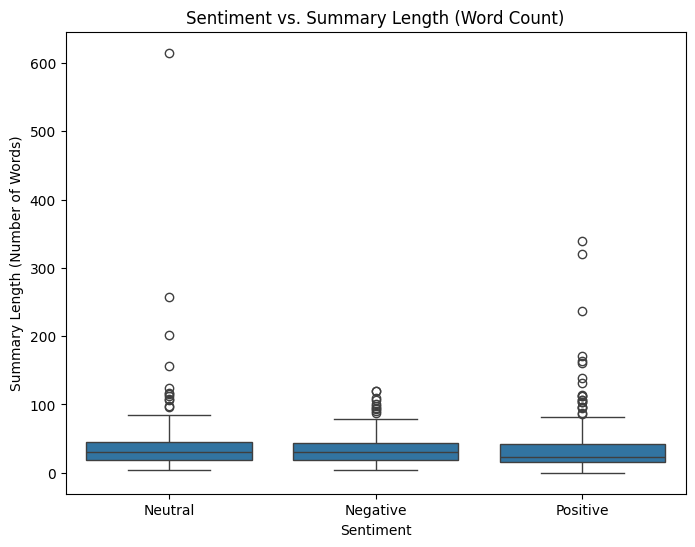

In [ ]:
# Check and handle missing values in the 'Summary' column
df['Summary'] = df['Summary'].fillna('')  # Replace NaN with empty string

# Calculate the length of each summary (number of words)
df['summary_length'] = df['Summary'].apply(lambda x: len(x.split()))

# Plot the relationship between sentiment and summary length
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='summary_length', data=df)

# Add labels and title
plt.title('Sentiment vs. Summary Length (Word Count)')
plt.xlabel('Sentiment')
plt.ylabel('Summary Length (Number of Words)')

# Display the plot
plt.show()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Top words in Positive summaries: [('tesla', 6286), ('musk', 4094), ('elon', 3610), ('business', 2857), ('inc', 2677)]
Top words in Neutral summaries: [('tesla', 4824), ('inc', 2566), ('musk', 2341), ('stock', 2308), ('elon', 2248)]


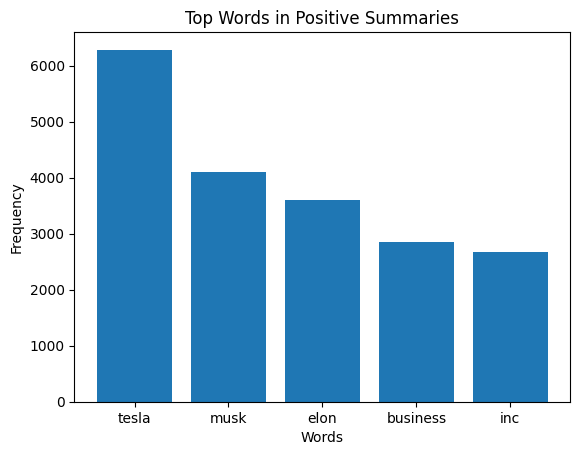

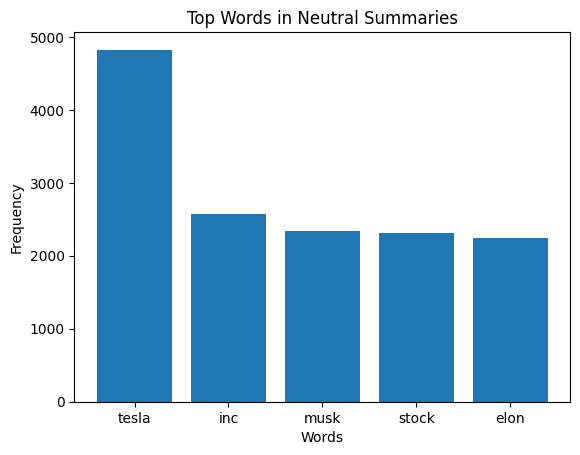

In [ ]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]
    return words

# Analyze top words for a given sentiment
def get_top_words(df, sentiment, top_n=5):
    # Filter summaries by sentiment
    filtered_df = df[df['Sentiment'] == sentiment]
    # Clean and tokenize all summaries for the given sentiment
    all_words = []
    for summary in filtered_df['Summary'].dropna():
        all_words.extend(clean_text(summary))
    # Count word frequencies
    word_counts = Counter(all_words)
    # Get the top N most common words
    return word_counts.most_common(top_n)

# Get top words for each sentiment
top_words_positive = get_top_words(df, 'Positive')
top_words_neutral = get_top_words(df, 'Neutral')
# If you had negative summaries, you'd call get_top_words for 'Negative'

# Display the top words for each sentiment
print("Top words in Positive summaries:", top_words_positive)
print("Top words in Neutral summaries:", top_words_neutral)

# You can visualize these results in a bar plot if needed
def plot_top_words(word_freq, sentiment):
    words, counts = zip(*word_freq)
    plt.bar(words, counts)
    plt.title(f'Top Words in {sentiment} Summaries')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

# Plot for positive summaries
plot_top_words(top_words_positive, 'Positive')

# Plot for neutral summaries
plot_top_words(top_words_neutral, 'Neutral')

In [ ]:
custom_stopwords = {'tesla', 'inc', 'musk', 'business', 'company', 'elon', 'stock'}

Top words in Positive summaries: [('investors', 2398), ('twitter', 2288), ('tsla', 2265), ('ceo', 2114), ('new', 2008)]
Top words in Neutral summaries: [('investors', 1850), ('tsla', 1768), ('market', 1656), ('twitter', 1590), ('us', 1564)]
Top words in Negative summaries: [('electric', 1539), ('market', 1394), ('tsla', 1116), ('ev', 1067), ('investors', 1065)]


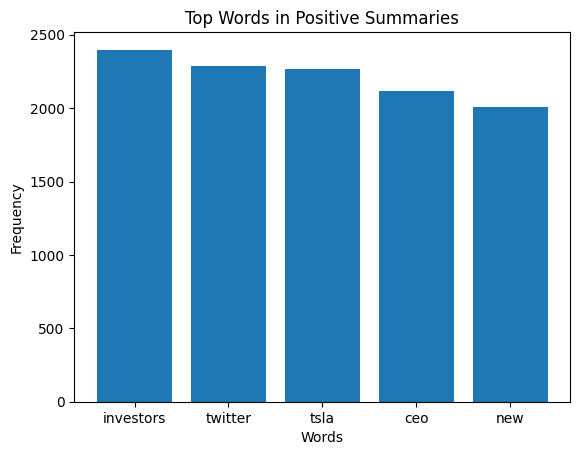

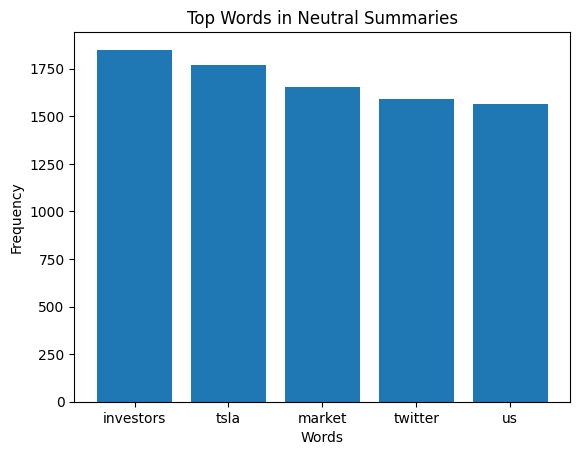

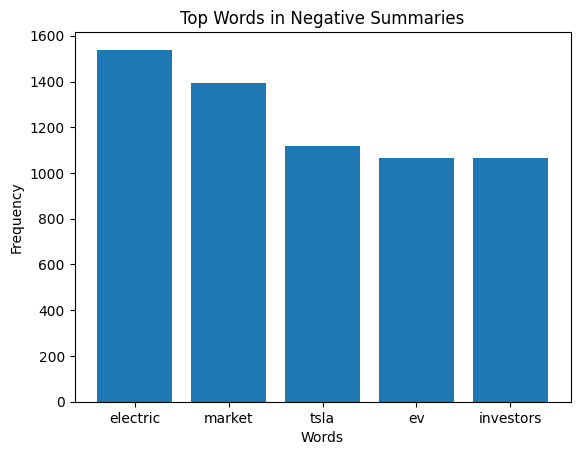

In [ ]:

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove standard stopwords and custom stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(custom_stopwords)  # Add custom stopwords to the list
    words = [word for word in text.split() if word not in stop_words]
    return words

# Analyze top words for a given sentiment
def get_top_words(df, sentiment, top_n=5):
    # Filter summaries by sentiment
    filtered_df = df[df['Sentiment'] == sentiment]
    # Clean and tokenize all summaries for the given sentiment
    all_words = []
    for summary in filtered_df['Summary'].dropna():
        all_words.extend(clean_text(summary))
    # Count word frequencies
    word_counts = Counter(all_words)
    # Get the top N most common words
    return word_counts.most_common(top_n)

# Get top words for each sentiment
top_words_positive = get_top_words(df, 'Positive')
top_words_neutral = get_top_words(df, 'Neutral')
top_words_negative = get_top_words(df, 'Negative')

# Display the top words for each sentiment
print("Top words in Positive summaries:", top_words_positive)
print("Top words in Neutral summaries:", top_words_neutral)
print("Top words in Negative summaries:", top_words_negative)

# You can visualize these results in a bar plot if needed
def plot_top_words(word_freq, sentiment):
    words, counts = zip(*word_freq)
    plt.bar(words, counts)
    plt.title(f'Top Words in {sentiment} Summaries')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

# Plot for positive summaries
plot_top_words(top_words_positive, 'Positive')

# Plot for neutral summaries
plot_top_words(top_words_neutral, 'Neutral')

# Plot for negative summaries
plot_top_words(top_words_negative, 'Negative')

#LSTM with OHLC

In [ ]:
dataset = yf.download('TSLA',interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
dataset

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2010-06-29 00:00:00+00:00,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30 00:00:00+00:00,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01 00:00:00+00:00,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02 00:00:00+00:00,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06 00:00:00+00:00,1.074000,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...,...
2024-10-17 00:00:00+00:00,220.889999,220.889999,222.080002,217.899994,221.589996,50791800
2024-10-18 00:00:00+00:00,220.699997,220.699997,222.279999,219.229996,220.710007,49611900


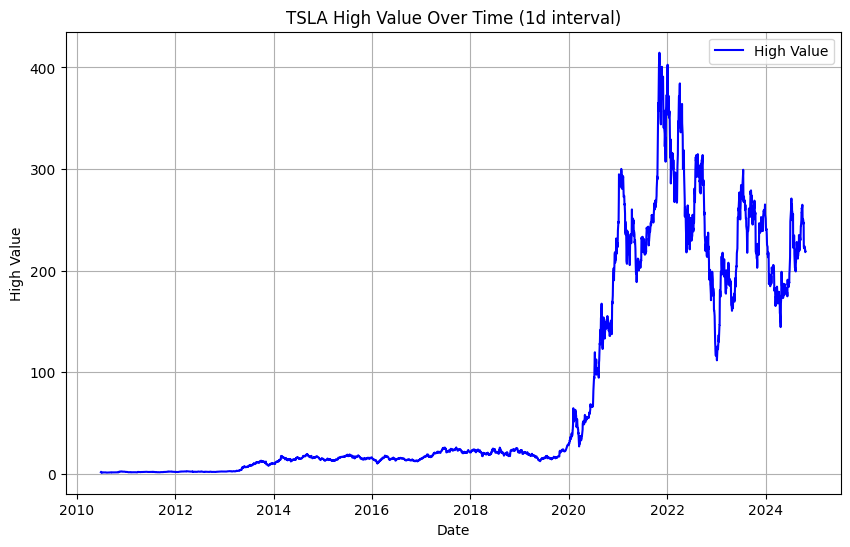

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(dataset.index, dataset['High'], label='High Value', color='blue')
plt.title('TSLA High Value Over Time (1d interval)')
plt.xlabel('Date')
plt.ylabel('High Value')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
dataset.reset_index(inplace = True)
scalar = MinMaxScaler(feature_range=(0, 1))

In [ ]:
def load_dataset(col_names, window,scalar, no_samples=None, starting=True):
    if not no_samples:
        no_samples = len(dataset)

    rdf = dataset.loc[:no_samples, col_names] if starting else dataset.loc[no_samples:, col_names]
    rdf_val = rdf.values

    rdf_val = rdf_val.astype(np.float64)

    # normalise

    rdf_val = scalar.fit_transform(rdf_val.reshape(-1, 1))


    st = time.time()


    ### Memory Efficient ##############################################################
    ndata = rdf_val.reshape((rdf_val.shape[0], 1))
    cdata = ndata[0:-window+0]
    for i in tqdm(range(1, window)):
           cdata = np.hstack((cdata, ndata[i:-window+i]))
    #####################################################################

    et = time.time() - st
    print(f"Loaded in: {et-st} sec")

    return cdata


In [ ]:
rolling = load_dataset(col_names='High', window=101, scalar= scalar)

100%|██████████| 100/100 [00:00<00:00, 3539.89it/s]

Loaded in: -1729486261.5448856 sec


In [ ]:
def train_test_split(cdata, pred_steps, shuffle=False):

    if shuffle:
        np.random.shuffle(cdata)

    train_days = int(0.80 * len(cdata))

    train = cdata[:train_days, :]
    test = cdata[train_days:, :]
    ## split into input and outputs
    train_X, train_y = train[:, :-pred_steps], train[:, -pred_steps:]
    test_X, test_y = test[:, :-pred_steps], test[:, -pred_steps:]

    ## reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

    return train_X, train_y, test_X, test_y

In [ ]:
train_x, train_y, test_x, test_y = train_test_split(rolling, 1)

In [ ]:
def lstm(
        data_x, data_y, test_x, test_y, in_features=100, out_features=1,
        loss='mean_squared_error', optimizer='adam', epochs=50, batch_size=64):
    ## design network
    model = Sequential()
    model.add(LSTM(in_features, return_sequences=True, input_shape=(data_x.shape[1], data_x.shape[2])))
    model.add(LSTM(512, return_sequences=True))
    model.add(LSTM(256, return_sequences=True))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dense(out_features))
    model.compile(loss=loss, optimizer=optimizer)

    ## fit network
    history = model.fit(data_x, data_y, epochs=epochs, batch_size=batch_size, validation_data=(test_x, test_y),
                        verbose=1,
                        shuffle=True)
    #model.save(save_path)

    return model, history

In [ ]:
def plot_lstm_history(history, save_path=None):
    pyplot.figure()
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    #pyplot.savefig()


def save_plot_xy(x, y, path=None):
    pyplot.figure()
    pyplot.plot(x)
    pyplot.plot(y)
    #pyplot.savefig()

In [ ]:
PRED_STEPS = 1
WINDOW = 101
# DATASET_TIMESERIES = "30M"
# INDEX = "BANKNIFTY"
# DESC = f"{INDEX}_{DATASET_TIMESERIES}_{WINDOW}W_{PRED_STEPS}PTS"
#MODEL_CHECKPOINT = os.path.join("model_checkpoints", f"CHK_{time.asctime()}_{DESC}")

model, history = lstm(train_x, train_y, test_x=test_x, test_y=test_y,
                        epochs=10, batch_size=64, loss='mean_squared_error', optimizer='adam',
                        out_features=PRED_STEPS)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 145ms/step - loss: 0.0285 - val_loss: 0.0252
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0016 - val_loss: 0.0067
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 9.0017e-04 - val_loss: 0.0052
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 6.2774e-04 - val_loss: 0.0095
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 7.0352e-04 - val_loss: 0.0037
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 4.3229e-04 - val_loss: 0.0041
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 4.0469e-04 - val_loss: 0.0028
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 4.7337e-04 - val_loss: 0.0027
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 3.6907e-04 - val_loss: 0.0033
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 3.4610e-04 - val_loss: 0.0068


In [ ]:
train_loss = model.evaluate(train_x, train_y, verbose=0)
test_loss = model.evaluate(test_x, test_y, verbose=0)

print(f"Train Loss (MSE): {train_loss}")
print(f"Test Loss (MSE): {test_loss}")

Train Loss (MSE): 0.0006855614483356476
Test Loss (MSE): 0.006768424063920975


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


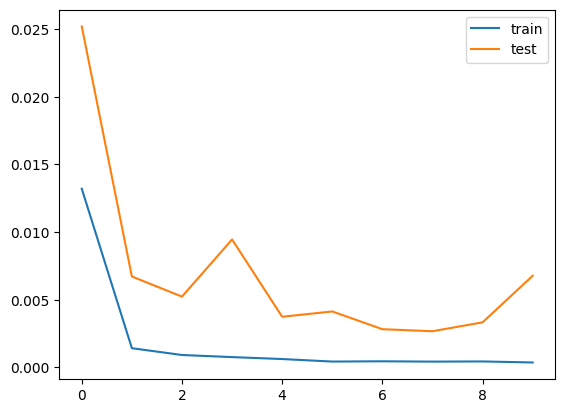

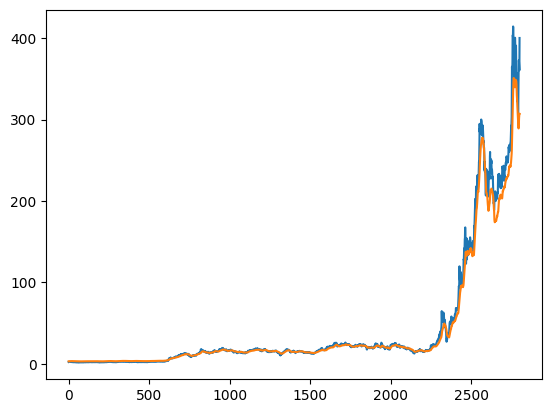

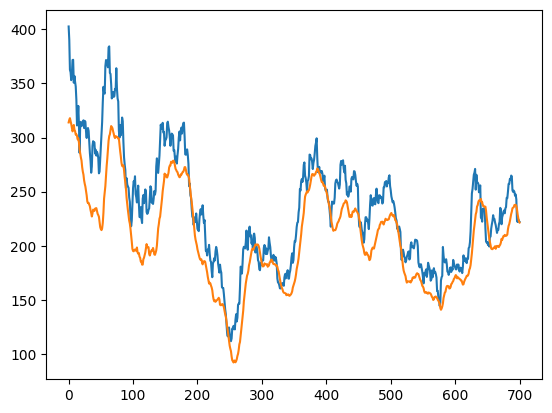

In [ ]:
# make a prediction
train_x_pred = model.predict(train_x)
test_x_pred = model.predict(test_x)

plot_lstm_history(history)# os.path.join(MODEL_CHECKPOINT, "train_history.jpg"))

#invert scaling
train_x_pred = train_x_pred.reshape(train_x_pred.shape[0], train_x_pred.shape[1])
test_x_pred = test_x_pred.reshape(test_x_pred.shape[0], test_x_pred.shape[1])
train_x_pred = scalar.inverse_transform(train_x_pred)
test_x_pred = scalar.inverse_transform(test_x_pred)


# plot results
save_plot_xy(scalar.inverse_transform(train_y[:, 0].reshape(-1, 1)),
             train_x_pred[:, 0].reshape(-1, 1))

save_plot_xy(scalar.inverse_transform(test_y[:, 0].reshape(-1, 1)),
             test_x_pred[:, 0].reshape(-1, 1))